In [1]:
from photutils.utils import CutoutImage
from astropy.io import fits
from numpy import save
from matplotlib import pyplot as plt
from astropy.visualization import simple_norm

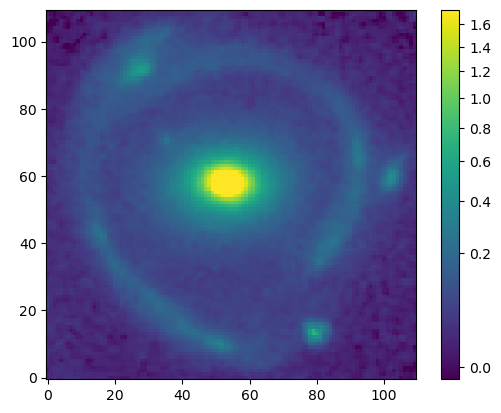

In [5]:
f=fits.open('final_96_drz.fits') 
observed_img = CutoutImage(f[1].data,[1070,1230],[110,110])
#save("cutout238b.npy",observed_img)

norm = simple_norm(observed_img, 'sqrt', percent=99.)
plt.imshow(observed_img, norm=norm, origin='lower', cmap='viridis')
#plt.colorbar()
plt.savefig("observed.png",transparent=True)